<a href="https://colab.research.google.com/github/jrim42/plant_bacteriology_lab/blob/main/Expr2_bacterial_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-posthocs

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import sem
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [2]:
import math
from scipy.stats import ttest_ind

---
## growth of day 0

In [3]:
day0_raw_ctrl = [4, 6, 2, 5]
day0_raw_agro = [9, 8, 4, 7]

day0_CFU_ctrl = [x * 100 for x in day0_raw_ctrl]  # [400, 600, 200, 500]
day0_CFU_agro = [x * 100 for x in day0_raw_agro]  # [900, 800, 400, 700]

day0_res_ctrl = math.log10(sum(day0_CFU_ctrl))
day0_res_agro = math.log10(sum(day0_CFU_agro))

print("log10(ctrl): ", day0_res_ctrl)
print("log10(agro): ", day0_res_agro)

log10(ctrl):  3.230448921378274
log10(agro):  3.4471580313422194


---
## growth of day 2

In [4]:
# C1: [81, 10, 3, 1, 0, 0]
# C2: [85, 15, 5, 7, 0, 0]
# C3: [6,  1,  0, 0, 0, 0]
# C4: [NA, 29, 2, 0, 0, 1]
# A1: [3,  0,  0, 0, 0, 0]
# A2: [1,  1,  0, 0, 0, 0]
# A3: [2,  0,  0, 0, 0, 0]
# A4: [6,  0,  0, 0, 1, 0]

DF = [10, 100, 1000, 10000, 100000, 1000000]

day2_raw_ctrl_DF1 = [81, 85, 6, 29]
day2_raw_ctrl_DF2 = [10, 15, 1, 29]
day2_raw_ctrl_DF3 = [3, 5, 0, 2]
day2_raw_ctrl_DF4 = [1, 7, 0, 0]
day2_raw_ctrl_DF5 = [0, 0, 0, 0]
day2_raw_ctrl_DF6 = [0, 0, 0, 1]

day2_raw_agro_DF1 = [3, 1, 2, 6]
day2_raw_agro_DF2 = [0, 1, 0, 0]
day2_raw_agro_DF3 = [0, 0, 0, 0]
day2_raw_agro_DF4 = [0, 0, 0, 0]
day2_raw_agro_DF5 = [0, 0, 0, 1]
day2_raw_agro_DF6 = [0, 0, 0, 0]

In [5]:
day2_CFU_ctrl = [x * 200 * DF[1] for x in day2_raw_ctrl_DF2]  # [200000, 300000, 20000, 580000]
day2_CFU_agro = [x * 200 * DF[1] for x in day2_raw_agro_DF2]  # [0, 20000, 0, 0]

day2_res_ctrl_DF2 = math.log10(sum(day2_CFU_ctrl))
day2_res_agro_DF2 = math.log10(sum(day2_CFU_agro))

print("log10(ctrl): ", day2_res_ctrl_DF2)
print("log10(agro): ", day2_res_agro_DF2)

log10(ctrl):  6.041392685158225
log10(agro):  4.301029995663981


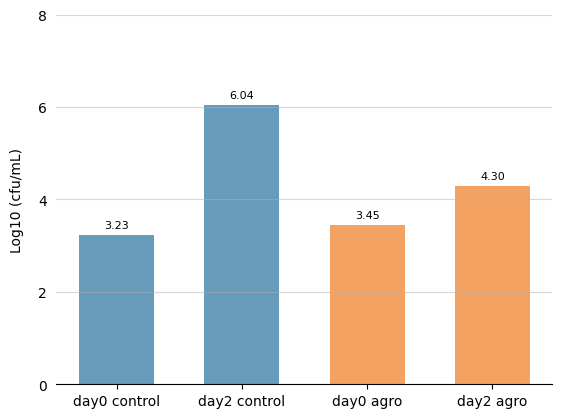

In [20]:
# labels = ['day0 control', 'day0 agro', 'day2 control', 'day2 agro']
# values = [day0_res_ctrl, day0_res_agro, day2_res_ctrl_DF2, day2_res_agro_DF2]
labels = ['day0 control', 'day2 control', 'day0 agro', 'day2 agro']
values = [day0_res_ctrl, day2_res_ctrl_DF2, day0_res_agro, day2_res_agro_DF2]

fig, ax = plt.subplots()

# ax.set_title('Bacterial Growth in N.Benthamiana')
ax.bar(labels, values, color=['#669bbc', '#669bbc', '#f4a261', '#f4a261'], width=0.6)
ax.set_ylabel('Log10 (cfu/mL)', labelpad=10)
ax.set_yticks(range(0, 9, 2))
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
ax.grid(axis='y', linestyle='-', alpha=0.5)

for i, v in enumerate(values):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

---
### statistical analysis

In [7]:
# day0 control (vs) day0 agro
day0_res = mannwhitneyu(day0_CFU_ctrl, day0_CFU_agro)
print("p-value:", day0_res.pvalue)

if day0_res.pvalue < 0.05:
    print("> significant difference")
else:
    print("> NO significant difference")

p-value: 0.14648918393520854
> NO significant difference


In [8]:
# day2 control (vs) day2 agro
day2_res = mannwhitneyu(day2_CFU_ctrl, day2_CFU_agro)
print("p-value:", day2_res.pvalue)

if day2_res.pvalue < 0.05:
    print("> significant difference")
else:
    print("> NO significant difference")

p-value: 0.037188196733455664
> significant difference


In [9]:
# day0 control (vs) day2 control
day2_res = mannwhitneyu(day0_CFU_ctrl, day2_CFU_ctrl)
print("p-value:", day2_res.pvalue)

if day2_res.pvalue < 0.05:
    print("> significant difference")
else:
    print("> NO significant difference")

p-value: 0.02857142857142857
> significant difference


In [10]:
# day0 agro (vs) day2 agro
day2_res = mannwhitneyu(day0_CFU_agro, day2_CFU_agro)
print("p-value:", day2_res.pvalue)

if day2_res.pvalue < 0.05:
    print("> significant difference")
else:
    print("> NO significant difference")

p-value: 0.30052231149547204
> NO significant difference
